In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/content/fake_reg.csv')

In [28]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


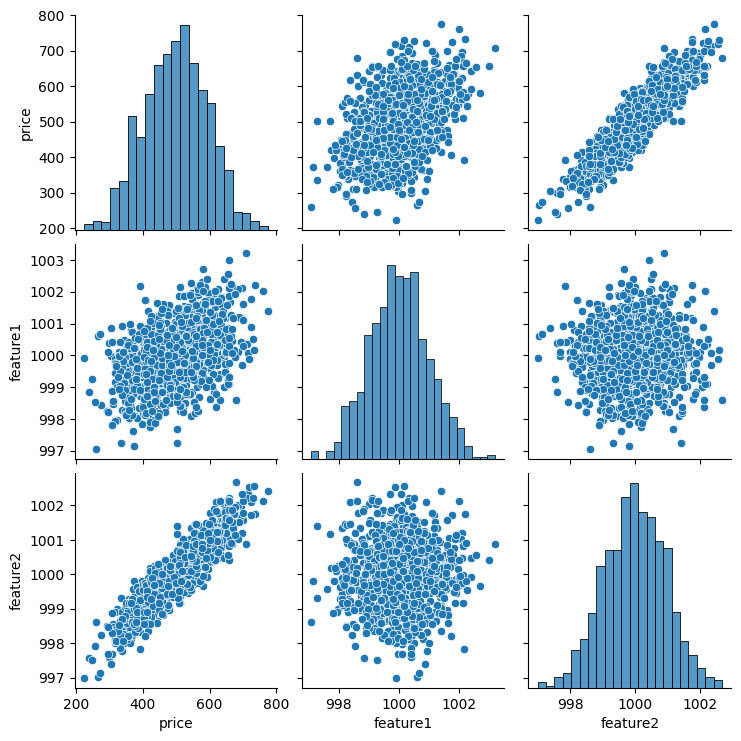

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [32]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [34]:
X_train.shape

(700, 2)

In [35]:
X_test.shape

(300, 2)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(X_train)

MinMaxScaler()

In [39]:
X_train = scaler.transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
X_train.max()

1.0

In [42]:
X_train.min()

0.0

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

In [45]:
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1))

In [46]:
model.compile(optimizer='rmsprop', loss='mse')

In [47]:
model.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254798.5938
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252693.1562 
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257880.0938 
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251691.0781 
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257882.4062 
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255759.7656 
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256534.5469 
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248678.7344  
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247120.0938 
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 248430.2344 
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 240787.1250 
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 239982.2188 
Epoch 13/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 232321.0938 
Epoch 14/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [48]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

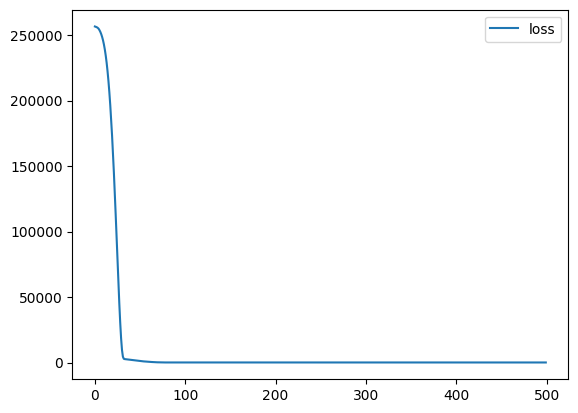

In [49]:
loss_df.plot()

In [50]:
model.evaluate(X_test, y_test, verbose=0)

25.107694625854492

In [51]:
model.evaluate(X_train, y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.2169


24.42156219482422

In [52]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [53]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [54]:
test_predictions

,0
0,404.821014
1,622.970398
2,591.570923
3,571.694702
4,366.192566
...,...
295,528.531311
296,514.856018
297,609.085876
298,416.468292


In [55]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [56]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [57]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [58]:
pred_df

,Test True Y,0
0,402.296319,404.821014
1,624.156198,622.970398
2,582.455066,591.570923
3,578.588606,571.694702
4,371.224104,366.192566
...,...,...
295,525.704657,528.531311
296,502.909473,514.856018
297,612.727910,609.085876
298,417.569725,416.468292


In [59]:
pred_df.columns=['Test True Y', "Model Predictions"]

In [60]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.821014
1,624.156198,622.970398
2,582.455066,591.570923
3,578.588606,571.694702
4,371.224104,366.192566
...,...,...
295,525.704657,528.531311
296,502.909473,514.856018
297,612.727910,609.085876
298,417.569725,416.468292


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

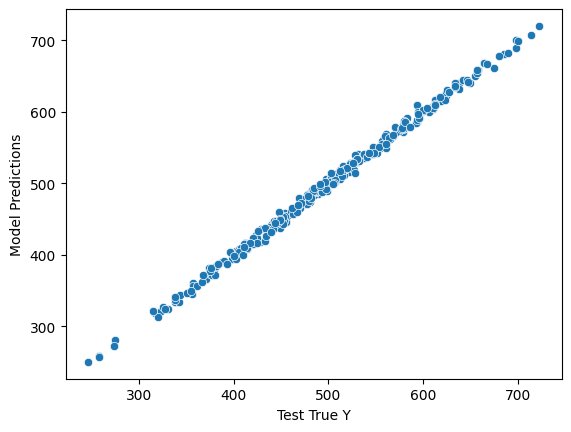

In [61]:
sns.scatterplot(x='Test True Y', y ='Model Predictions', data= pred_df)

<Axes: >

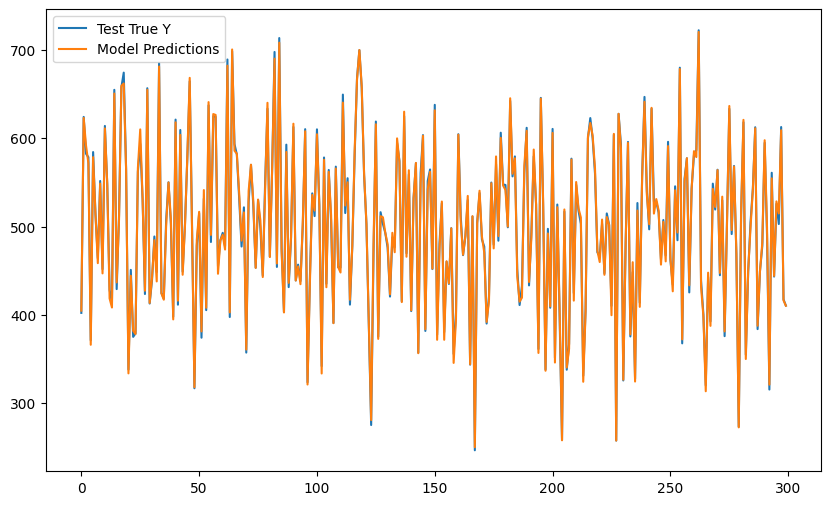

In [62]:
pred_df.plot(figsize=(10, 6))

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [64]:
mean_absolute_error(y_test, test_predictions)

4.012597334557682

In [65]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [66]:
new_gem = [[998, 1000]]

In [67]:
new_gem = scaler.transform(new_gem)

In [68]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[419.2363]], dtype=float32)